In [1]:
%load_ext lab_black
import pandas as pd
import datetime as dt

file_path = "/Users/fredrikjohannessen/Desktop/repositories/pandas-payground/data/"

`datetime` is a standard python library. 

### Review of Python's `datetime` module

The `datetime` module contains a class called `datetime`

In [2]:
someday = dt.date(1989, 12, 5)

someday.year
someday.month
someday.day

dt.datetime(1989, 12, 5)
dt.datetime(1989, 12, 5, 11, 1)
str(dt.datetime(1989, 12, 5, 11, 1, 12))
sometime = dt.datetime(1989, 12, 5, 11, 1, 12)
sometime.second

12

### The pandas `Timestamp` object

Note! There is a lot more we can do with a pandas `timestamp` object than a python `datetime` object. <br>
Tries to be smart when converting string to timestamp:

In [3]:
pd.Timestamp("2020-02-01")
pd.Timestamp("2020/02/01")
pd.Timestamp("01/02/2020")
pd.Timestamp("2020-02-01 08:30:00")
pd.Timestamp(dt.date(2020, 2, 1))
pd.Timestamp(dt.datetime(2020, 2, 1, 8, 30, 0))

Timestamp('2020-02-01 08:30:00')

### The pandas `DatetimeIndex` object

In [4]:
dates = ["2021-03-12", "2023-01-15", "2010-12-06"]
pd.DatetimeIndex(dates)
dates = [dt.date(2021, 3, 12), dt.date(2023, 1, 15), dt.date(2010, 12, 6)]
pd.DatetimeIndex(dates)

values = [1, 2, 3]

pd.DataFrame(data=values, index=pd.DatetimeIndex(dates), columns=["dummy"])

,dummy
2021-03-12,1
2023-01-15,2
2010-12-06,3


### The `pd.to_datetime()` Method

In [5]:
pd.to_datetime("2020-02-03")
pd.to_datetime(dt.datetime(2015, 3, 10, 8, 30, 30))
pd.to_datetime(
    [
        dt.datetime(2015, 3, 10, 8, 30, 30),
        "2013-03-12",
        "2002",
        "July 4th 1996",
        "12/11/1994",
    ]
)

times = pd.Series(["2020-02-03", "2021-12-16", "2011-11-09", "2020-07-03"])
pd.to_datetime(times)


times = pd.Series(["2020-02-03", "2021-12-16", "2011-11-09", "HELLO!!!"])
pd.to_datetime(times, errors="coerce")

pd.to_datetime(1232357425, unit="s")  # Seconds since 1970

Timestamp('2009-01-19 09:30:25')

### Create range of dates with the `pd.date_range()` Method

In [6]:
pd.date_range(start="2019-01-01", end="2019-01-05")
pd.date_range(start="2019-01-01", end="2019-04-01", freq="M")
pd.date_range(start="2019-01-01", end="2022-01-01", freq="Y")

pd.DataFrame(
    index=pd.date_range(start="2019-01-01", end="2019-01-05"),
    data=[1, 2, 3, 4, 5],
)

pd.date_range(start="2019-01-01", end="2019-01-25", freq="W-FRI")
pd.date_range(start="2019-01-01", end="2019-01-01 04:00:00", freq="H")

pd.date_range(start="2019-01-01", end="2019-02-05", periods=5)
pd.date_range(start="2019-01-01", freq="W", periods=5)

DatetimeIndex(['2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03'],
              dtype='datetime64[ns]', freq='W-SUN')

### The .dt accessor

In [31]:
bunch_of_dates = pd.date_range(start="2000-01-01", end="2010-12-31", freq="24D")
s = pd.Series(bunch_of_dates)
s.dt.isocalendar().week

mask = s.dt.is_quarter_start
s[mask]

0     2000-01-01
19    2001-04-01
38    2002-07-01
137   2009-01-01
dtype: datetime64[ns]

### Import Financial Data Set with `pandas_datareader` library

In [37]:
from pandas_datareader import data
import matplotlib.pyplot as plt

,Open,High,Low,Close,Volume
Date,,,,,
2023-03-08,152.810,153.4700,151.83,152.87,47204791.0
2023-03-07,153.700,154.0299,151.13,151.60,56182028.0
2023-03-06,153.785,156.3000,153.46,153.83,87558028.0


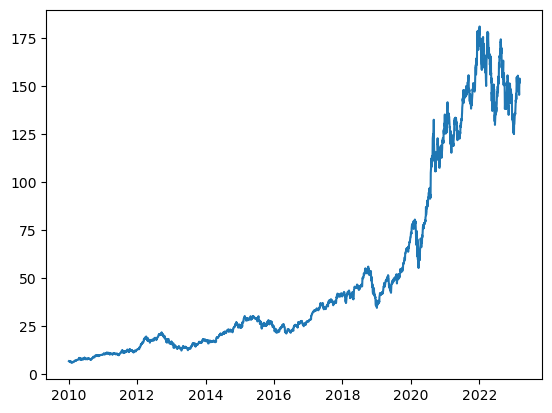

In [55]:
stocks = data.DataReader(
    name="AAPL", data_source="stooq", start="2010-01-01", end="2023-03-09"
)

display(stocks.head(3))

x = stocks.index
y = stocks.Close
plt.plot(x, y)
plt.show()

In [57]:
stocks.index
stocks.axes

[DatetimeIndex(['2023-03-08', '2023-03-07', '2023-03-06', '2023-03-03',
                '2023-03-02', '2023-03-01', '2023-02-28', '2023-02-27',
                '2023-02-24', '2023-02-23',
                ...
                '2010-01-15', '2010-01-14', '2010-01-13', '2010-01-12',
                '2010-01-11', '2010-01-08', '2010-01-07', '2010-01-06',
                '2010-01-05', '2010-01-04'],
               dtype='datetime64[ns]', name='Date', length=3317, freq=None),
 Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')]

### Selecting rows from a `DataFrame` with `DatetimeIndex`

In [76]:
stocks.loc["2018-03-19"]
stocks.loc[pd.Timestamp("2018-03-19")]
stocks.iloc[0]

stocks.loc[["2018-03-19", "2018-03-20"]]
stocks.loc[[pd.Timestamp("2018-03-19"), pd.Timestamp("2018-03-20")]]


stocks.loc["2018-03-19":"2018-03-22"]

,Open,High,Low,Close,Volume
Date,,,,,
2018-03-22,40.5762,41.2173,40.2442,40.3060,1.738240e+08
2018-03-21,41.7836,41.7955,40.8763,40.8783,1.552402e+08
2018-03-20,41.8324,42.1973,41.7576,41.8324,8.232019e+07
2018-03-19,42.3229,42.3598,41.4515,41.8444,1.401240e+08


In [82]:
birthdays = pd.date_range(
    start="1989-12-05", end="2023-03-09", freq=pd.DateOffset(years=1)
)
mask = stocks.index.isin(birthdays)
stocks[mask]
stocks.loc[mask]

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-05,147.7700,150.9199,145.7700,146.6300,6.882644e+07
2019-12-05,64.6079,65.1194,64.3488,65.0446,7.619382e+07
2017-12-05,40.1874,40.7737,40.0379,40.3310,1.149085e+08
2016-12-05,25.7335,25.7405,25.3288,25.5252,1.380482e+08
2014-12-05,26.1004,26.1224,25.7953,25.8831,1.702354e+08
2013-12-05,18.0310,18.1088,17.8326,17.8804,5.071025e+08
2012-12-05,17.4737,17.4837,16.5495,16.5495,1.213760e+09
2011-12-05,11.9774,12.0672,11.8848,11.9636,4.189027e+08


### `Timestamp` Object Attributes and Methods

In [94]:
someday = stocks.index[500]
someday.month
someday.year
someday.week
someday.second
someday.is_quarter_start

False

In [102]:
someday.weekday()
someday.month_name()
someday.day_name()

stocks.index.day_name()

Index(['Wednesday', 'Tuesday', 'Monday', 'Friday', 'Thursday', 'Wednesday',
       'Tuesday', 'Monday', 'Friday', 'Thursday',
       ...
       'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Friday',
       'Thursday', 'Wednesday', 'Tuesday', 'Monday'],
      dtype='object', name='Date', length=3317)

In [109]:
stocks.insert(0, column="Day of week", value=stocks.index.day_name())
stocks.insert(1, column="Is start of Month", value=stocks.index.is_month_start)
stocks[stocks["Is start of Month"]].head(3)

ValueError: cannot insert Day of week, already exists

### The `pd.DateOffset` object

In [112]:
stocks.index + pd.DateOffset(years=1)

DatetimeIndex(['2024-03-08', '2024-03-07', '2024-03-06', '2024-03-03',
               '2024-03-02', '2024-03-01', '2024-02-28', '2024-02-27',
               '2024-02-24', '2024-02-23',
               ...
               '2011-01-15', '2011-01-14', '2011-01-13', '2011-01-12',
               '2011-01-11', '2011-01-08', '2011-01-07', '2011-01-06',
               '2011-01-05', '2011-01-04'],
              dtype='datetime64[ns]', name='Date', length=3317, freq=None)

### The Timeseries Offsets

In [121]:
stocks.index + pd.tseries.offsets.MonthEnd()
stocks.index + pd.tseries.offsets.YearBegin()
stocks.index + pd.tseries.offsets.BusinessDay()

DatetimeIndex(['2023-03-09', '2023-03-08', '2023-03-07', '2023-03-06',
               '2023-03-03', '2023-03-02', '2023-03-01', '2023-02-28',
               '2023-02-27', '2023-02-24',
               ...
               '2010-01-18', '2010-01-15', '2010-01-14', '2010-01-13',
               '2010-01-12', '2010-01-11', '2010-01-08', '2010-01-07',
               '2010-01-06', '2010-01-05'],
              dtype='datetime64[ns]', name='Date', length=3317, freq=None)

### The `Timedelta` Object

A duration of time

In [127]:
time_a = pd.Timestamp("2020-03-01 19:15:33")
time_b = pd.Timestamp("2020-03-04")
time_b - time_a
time_a - time_b

Timedelta('-3 days +19:15:33')

In [134]:
time_a + pd.Timedelta("3 days, 3 minutes")
time_a + pd.Timedelta(weeks=2, days=3, minutes=9)

Timestamp('2020-03-18 19:24:33')

In [150]:
df = pd.read_csv(
    file_path + "ecommerce.csv",
    index_col="ID",
    parse_dates=["order_date", "delivery_date"],
)

df["Time to deliver"] = df.delivery_date - df.order_date
df = df.sort_values(by="Time to deliver")
df[df["Time to deliver"] > "365 days"].head()

,order_date,delivery_date,Time to deliver
ID,,,
457,1991-06-17,1992-06-18,367 days
11,1996-07-12,1997-07-14,367 days
76,1997-05-26,1998-06-05,375 days
445,1993-02-11,1994-02-24,378 days
326,1998-05-12,1999-05-29,382 days
